In [1]:
#For Kaggle
#date=''

#For WL data
source='WL'
date='20241118'

saveImage=False

print('done')

done


In [2]:
import sys
import os
from importlib import reload
fpath = os.path.join('..//scripts')
sys.path.append(fpath)

import warnings
warnings.filterwarnings('ignore')

#loading internal scripts
import frauddetection as fd
import sourcedata as sd
import dataimport as di
import result as resultMd
reload(fd)
reload(sd)
reload(di)
reload(resultMd)

print('done')

done


In [3]:
import pandas as pd

dfTrx = pd.read_csv('../data/cleaned/'+source+'export'+date+'.csv')
dfTrx.head(5)

,db_uuid,trx_date_time,term_mcc,term_country,mcd_fraud_score,vaa_score,card_pan_id,Class,ecom,card_brand_MCD,...,clusterCardHolder_cluster3,clusterCardHolder_cluster4,clusterMerchant_M0,clusterMerchant_M1,clusterMerchant_M2,clusterMerchant_M3,clusterMerchant_UNKNOWN,trx_amount_log10,previous_trx,distancePrevTrx
0,31BD8D38A53C11EFABA49D2778D26ADA,2024-11-18 00:29:22,5499,NLD,214.000000,26.258093,450280D96024C965163D7F15687156B138E1BDCB6DC512...,0,1,1,...,0,0,1,0,0,0,0,1.690107,0,1.1
1,A3E698CEA53B11EFABA49D2778D26ADA,2024-11-18 00:27:12,5499,NLD,225.222235,32.000000,68B7CAD29BF263AD2CE80B155DD3D3EE783884F72F7070...,0,1,0,...,0,0,1,0,0,0,0,1.799272,0,1.1
2,C5D7AAE6A53A11EFAAA0DF784AB5695E,2024-11-18 00:20:15,7011,BEL,152.000000,26.258093,02587C2F031D3D22C997A9A4E6CB78D6A87A2C73E61131...,0,1,1,...,0,0,0,0,0,1,0,1.374015,0,1.0
3,9C87AE3EA53F11EFABA49D2778D26ADA,2024-11-18 00:53:48,5542,BEL,225.222235,26.258093,CD32793A75DE03806C854CB3B6C2DF5BB2809C2DA66BA9...,0,1,0,...,0,1,0,0,0,1,0,1.205204,0,1.0
4,9C87B0B4A53F11EFABA49D2778D26ADA,2024-11-18 00:53:48,5542,BEL,225.222235,26.258093,CD32793A75DE03806C854CB3B6C2DF5BB2809C2DA66BA9...,0,1,0,...,0,1,0,0,0,1,0,1.205204,0,1.1


# Under sampling in Python

In [5]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

predictors = fd.getPredictors(dfTrx)
TEST_SIZE = 0.20 # test size using_train_test_split
RANDOM_STATE = 0
x_train0, x_test, y_train0, y_test = train_test_split(dfTrx[predictors], dfTrx['Class'], test_size = TEST_SIZE, 
                                                        stratify= dfTrx['Class'],
                                                        random_state = RANDOM_STATE)

#scaler=StandardScaler()
#x_train= scaler.fit_transform(x_train0)
#x_test= scaler.transform(x_test)
x_train= x_train0.copy()
x_test = x_test.copy()



(847879, 30)
(10934, 30)
Duration  0.000407
Duration  18.552742
test-set confusion matrix:
 [[207451   4271]
 [   102    146]]
accuracy score: 0.9794
balanced accuracy score: 0.7843
recall score: 0.5887
precision score: 0.0331
f1 score: 0.0626
mcc score: 0.1361
roc auc score: 0.7843
test-set confusion matrix:
 [[9809  131]
 [ 391  603]]
accuracy score: 0.9523
balanced accuracy score: 0.7967
recall score: 0.6066
precision score: 0.8215
f1 score: 0.6979
mcc score: 0.6818
roc auc score: 0.7967
test-set confusion matrix:
 [[207451   4271]
 [   102    146]]
accuracy score: 0.9794
balanced accuracy score: 0.7843
recall score: 0.5887
precision score: 0.0331
f1 score: 0.0626
mcc score: 0.1361
roc auc score: 0.7843
No feature importance


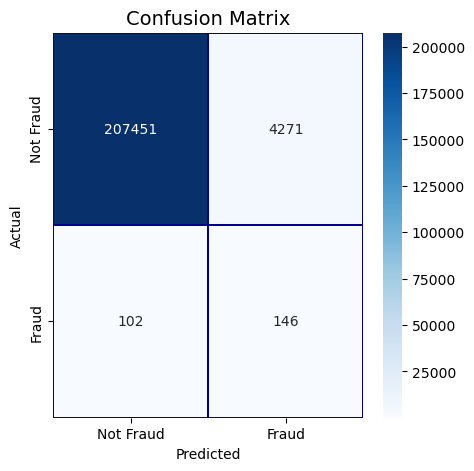

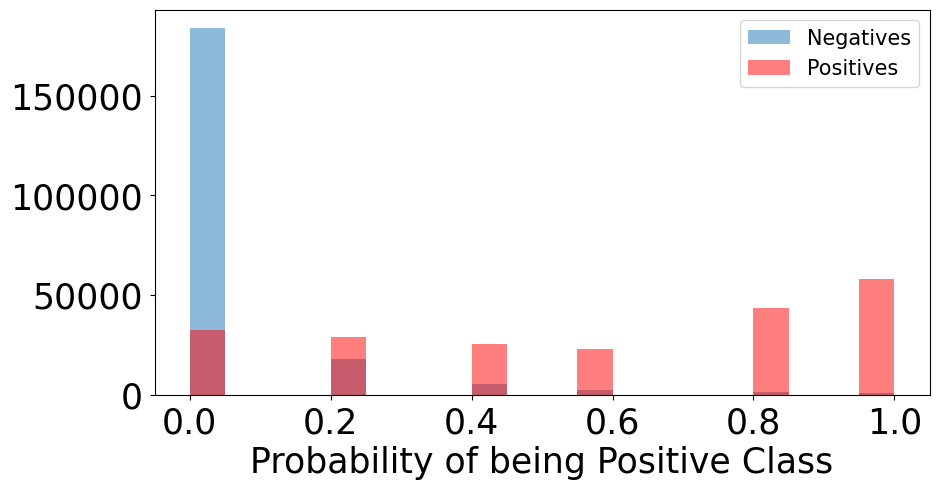

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

then= datetime.now()
undersample = RandomUnderSampler(sampling_strategy=0.1,random_state=42)
print(x_train0.shape)
now = datetime.now()
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print(x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)
#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

1-x_train.shape (10934, 30)
2-x_train.shape (847879, 30)
1-Duration  0.000997
2-Duration  22.48902
test-set confusion matrix:
 [[ 68926 142796]
 [    35    213]]
accuracy score: 0.3262
balanced accuracy score: 0.5922
recall score: 0.8589
precision score: 0.0015
f1 score: 0.0030
mcc score: 0.0135
roc auc score: 0.5922
test-set confusion matrix:
 [[9918   22]
 [ 179  815]]
accuracy score: 0.9816
balanced accuracy score: 0.9089
recall score: 0.8199
precision score: 0.9737
f1 score: 0.8902
mcc score: 0.8841
roc auc score: 0.9089
test-set confusion matrix:
 [[ 68926 142796]
 [    35    213]]
accuracy score: 0.3262
balanced accuracy score: 0.5922
recall score: 0.8589
precision score: 0.0015
f1 score: 0.0030
mcc score: 0.0135
roc auc score: 0.5922
No feature importance


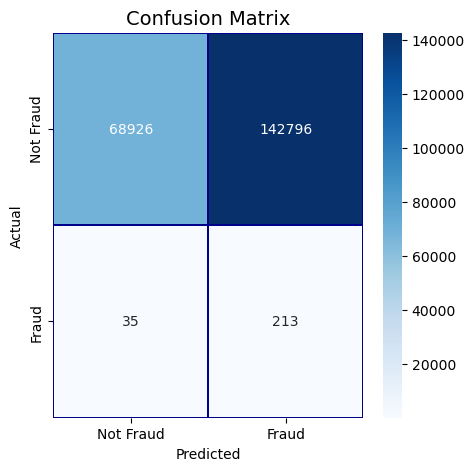

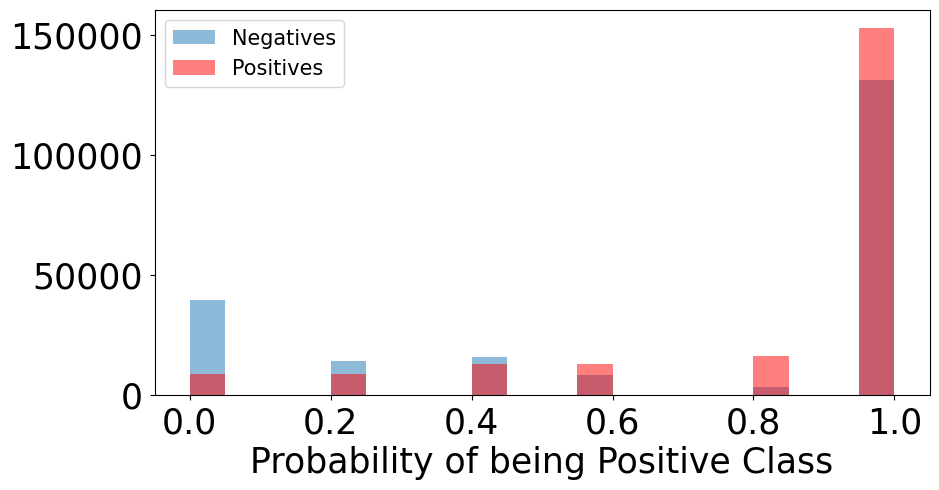

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

then= datetime.now()
undersample = NearMiss(sampling_strategy=0.1,version=1, n_neighbors=3)
print("1-x_train.shape",x_train.shape)
now = datetime.now()
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print("2-x_train.shape",x_train0.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

1-x_train.shape (847879, 30)
2-x_train.shape (10934, 30)
1-Duration  0.0
2-Duration  56.115736
test-set confusion matrix:
 [[  3001 208721]
 [     2    246]]
accuracy score: 0.0153
balanced accuracy score: 0.5031
recall score: 0.9919
precision score: 0.0012
f1 score: 0.0024
mcc score: 0.0018
roc auc score: 0.5031
test-set confusion matrix:
 [[9940    0]
 [  13  981]]
accuracy score: 0.9988
balanced accuracy score: 0.9935
recall score: 0.9869
precision score: 1.0000
f1 score: 0.9934
mcc score: 0.9928
roc auc score: 0.9935
test-set confusion matrix:
 [[  3001 208721]
 [     2    246]]
accuracy score: 0.0153
balanced accuracy score: 0.5031
recall score: 0.9919
precision score: 0.0012
f1 score: 0.0024
mcc score: 0.0018
roc auc score: 0.5031
No feature importance


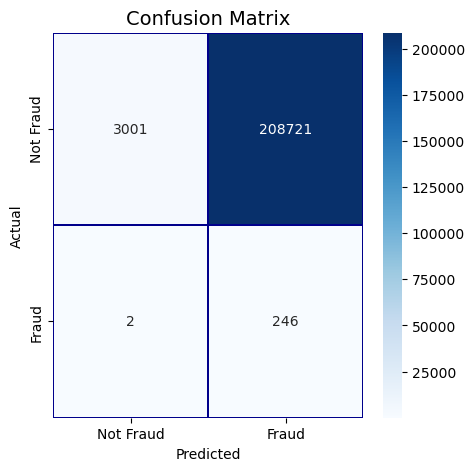

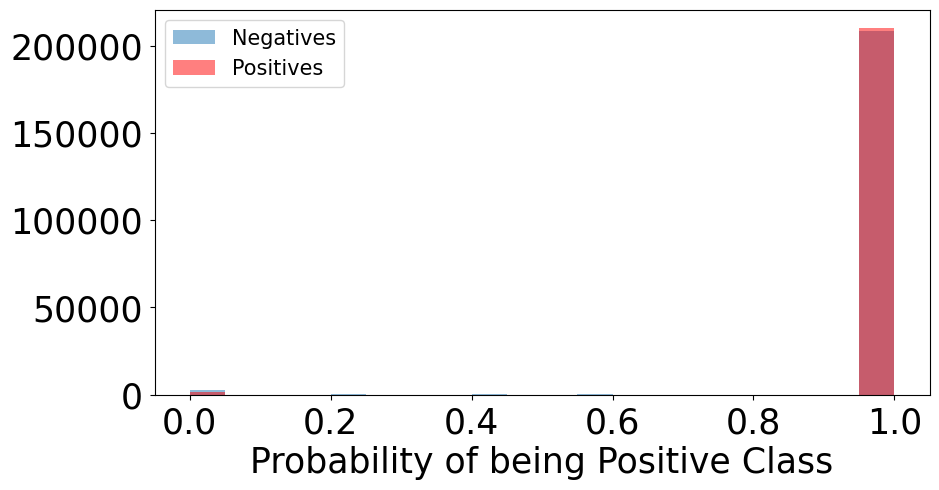

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

then= datetime.now()
undersample = NearMiss(sampling_strategy=0.1,version=2, n_neighbors=3)
print("1-x_train.shape",x_train0.shape)
now = datetime.now()
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print("2-x_train.shape",x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

1-x_train.shape (847879, 30)
2-x_train.shape (3657, 30)
1-Duration  0.001254
2-Duration  16.817598
test-set confusion matrix:
 [[211135    587]
 [   235     13]]
accuracy score: 0.9961
balanced accuracy score: 0.5248
recall score: 0.0524
precision score: 0.0217
f1 score: 0.0307
mcc score: 0.0319
roc auc score: 0.5248
test-set confusion matrix:
 [[2631   32]
 [ 939   55]]
accuracy score: 0.7345
balanced accuracy score: 0.5217
recall score: 0.0553
precision score: 0.6322
f1 score: 0.1018
mcc score: 0.1265
roc auc score: 0.5217
test-set confusion matrix:
 [[211135    587]
 [   235     13]]
accuracy score: 0.9961
balanced accuracy score: 0.5248
recall score: 0.0524
precision score: 0.0217
f1 score: 0.0307
mcc score: 0.0319
roc auc score: 0.5248
No feature importance


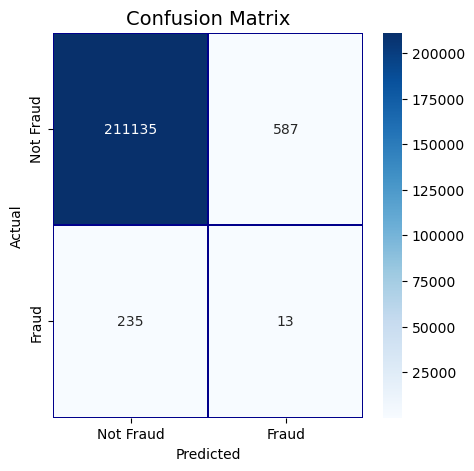

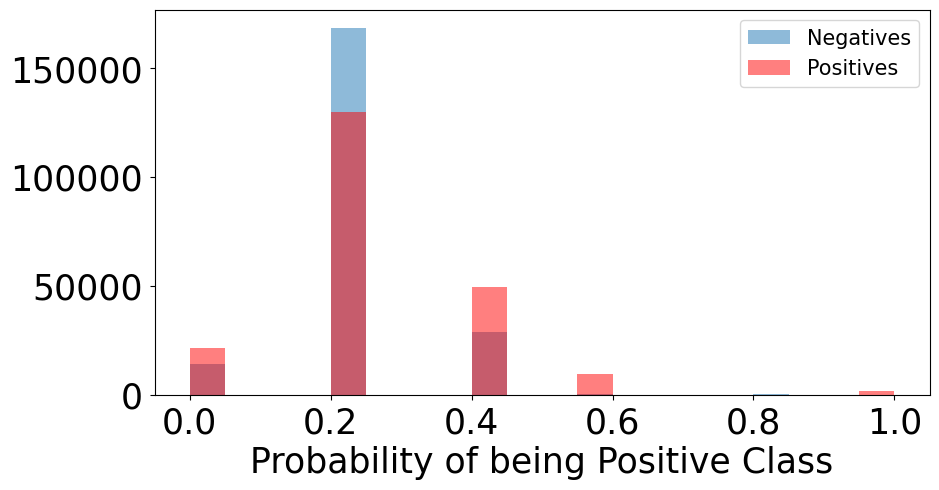

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

then= datetime.now()
undersample = NearMiss(sampling_strategy=0.1,version=3, n_neighbors=3)
print("1-x_train.shape",x_train0.shape)
now = datetime.now()
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print("2-x_train.shape",x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

# combined version  EditedNearestNeighbours RandomUnderSampler

1-x_train.shape (847879, 30)
2025-03-14 22:08:45.210358
2025-03-14 22:42:24.104833
2-x_train.shape (841121, 30)
2025-03-14 22:42:24.455711
2-x_train.shape (10934, 30)
1-Duration  0.000539
2-Duration  2048.81822
test-set confusion matrix:
 [[207148   4574]
 [   101    147]]
accuracy score: 0.9779
balanced accuracy score: 0.7856
recall score: 0.5927
precision score: 0.0311
f1 score: 0.0592
mcc score: 0.1323
roc auc score: 0.7856
test-set confusion matrix:
 [[9808  132]
 [ 381  613]]
accuracy score: 0.9531
balanced accuracy score: 0.8017
recall score: 0.6167
precision score: 0.8228
f1 score: 0.7050
mcc score: 0.6884
roc auc score: 0.8017
test-set confusion matrix:
 [[207148   4574]
 [   101    147]]
accuracy score: 0.9779
balanced accuracy score: 0.7856
recall score: 0.5927
precision score: 0.0311
f1 score: 0.0592
mcc score: 0.1323
roc auc score: 0.7856
No feature importance


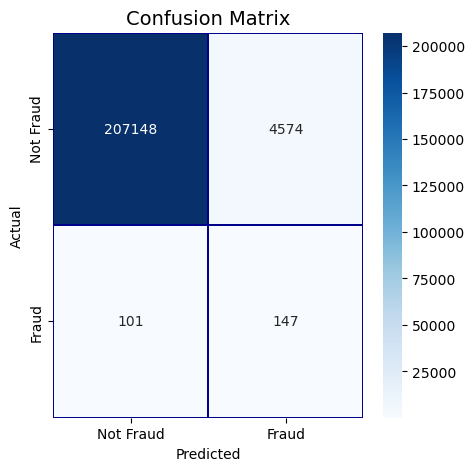

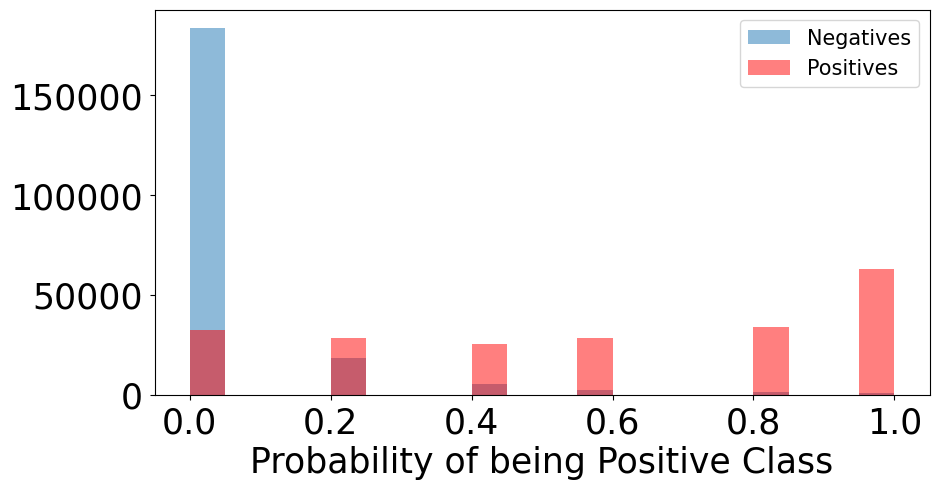

In [11]:
# very slow !!!!
# increase n_neighbors otherwhise not enough removed -> put 1000
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

then= datetime.now()

undersample1 = EditedNearestNeighbours(n_neighbors=10)
undersample2 = RandomUnderSampler(sampling_strategy=0.01,random_state=42)
print("1-x_train.shape",x_train0.shape)
now = datetime.now()
print(datetime.now())
x_train, y_train = undersample1.fit_resample(x_train0, y_train0)
print(datetime.now())
print("2-x_train.shape",x_train.shape)
x_train, y_train = undersample2.fit_resample(x_train, y_train)
print(datetime.now())
print("2-x_train.shape",x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

2025-03-14 22:43:04.793234
2025-03-14 23:13:09.992010
2-x_train.shape (845404, 30)
1-Duration  0.015048
2-Duration  3949.737344
test-set confusion matrix:
 [[211688     34]
 [   229     19]]
accuracy score: 0.9988
balanced accuracy score: 0.5382
recall score: 0.0766
precision score: 0.3585
f1 score: 0.1262
mcc score: 0.1653
roc auc score: 0.5382
test-set confusion matrix:
 [[844387     23]
 [   882    112]]
accuracy score: 0.9989
balanced accuracy score: 0.5563
recall score: 0.1127
precision score: 0.8296
f1 score: 0.1984
mcc score: 0.3055
roc auc score: 0.5563
test-set confusion matrix:
 [[211688     34]
 [   229     19]]
accuracy score: 0.9988
balanced accuracy score: 0.5382
recall score: 0.0766
precision score: 0.3585
f1 score: 0.1262
mcc score: 0.1653
roc auc score: 0.5382
No feature importance


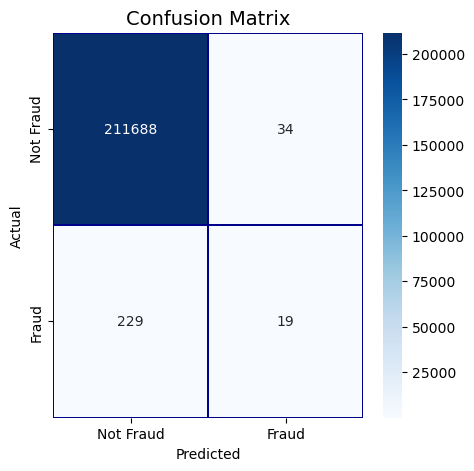

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import train_test_split

then= datetime.now()
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
now = datetime.now()
print(datetime.now())
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print(datetime.now())
print("2-x_train.shape",x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

In [ ]:
# very slow !!!!
# increase n_neighbors otherwhise not enough removed -> put 1000
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split

then= datetime.now()
undersample = EditedNearestNeighbours(n_neighbors=1000)
print("1-x_train.shape",x_train0.shape)
now = datetime.now()
print(datetime.now())
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print(datetime.now())
print("2-x_train.shape",x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import OneSidedSelection
from sklearn.model_selection import train_test_split

then= datetime.now()
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
print("1-x_train.shape",x_train0.shape)
now = datetime.now()
print(datetime.now())
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print(datetime.now())
print("2-x_train.shape",x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split

then= datetime.now()
undersampler = TomekLinks()
print("1-x_train.shape",x_train0.shape)
now = datetime.now()
print(datetime.now())
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print(datetime.now())
print("2-x_train.shape",x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)

In [ ]:
#%%script false
## very slow !!!! to confirù ????


from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.model_selection import train_test_split

then= datetime.now()
print(datetime.now())
undersample = CondensedNearestNeighbour(n_neighbors=1, n_jobs=3)
print(datetime.now())
print("1-x_train.shape",x_train0.shape)
now = datetime.now()
x_train, y_train = undersample.fit_resample(x_train0, y_train0)
print(datetime.now())
print("2-x_train.shape",x_train.shape)
duration= now - then
duration_in_s = duration.total_seconds()
print("1-Duration ",duration_in_s)

modelClf = KNeighborsClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("2-Duration ",duration_in_s)

#resultMd.update_time_response_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
#resultMd.update_performance_test_result('05-sklearn.neighbors','KNeighborsClassifier','2-DownSampling', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)